In [1]:
# pip install osmnx==0.16.2
# conda install shapely

In [2]:
import osmnx as ox
import time
from shapely.geometry import Polygon
import os

def save_graph_shapefile_directional(G, filepath=None, encoding="utf-8"):
    # default filepath if none was provided
    if filepath is None:
        filepath = os.path.join(ox.settings.data_folder, "graph_shapefile")

    # if save folder does not already exist, create it (shapefiles
    # get saved as set of files)
    if not filepath == "" and not os.path.exists(filepath):
        os.makedirs(filepath)
    filepath_nodes = os.path.join(filepath, "nodes.shp")
    filepath_edges = os.path.join(filepath, "edges.shp")

    # convert undirected graph to gdfs and stringify non-numeric columns
    gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G)
    gdf_nodes = ox.io._stringify_nonnumeric_cols(gdf_nodes)
    gdf_edges = ox.io._stringify_nonnumeric_cols(gdf_edges)
    # We need an unique ID for each edge
    gdf_edges["fid"] = gdf_edges.index
    # save the nodes and edges as separate ESRI shapefiles
    gdf_nodes.to_file(filepath_nodes, encoding=encoding)
    gdf_edges.to_file(filepath_edges, encoding=encoding)

print("osmnx version",ox.__version__)

d:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


osmnx version 0.16.2


In [3]:
#Download network in a city
place ='Porto, Portugal'
G = ox.graph_from_place(place, network_type='drive', which_result=2)
save_graph_shapefile_directional(G, filepath='../data/porto_by_city')

d:\Anaconda\lib\site-packages\osmnx\geocoder.py:97: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr))
d:\Anaconda\lib\site-packages\osmnx\utils_geo.py:281: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
d:\Anaconda\lib\site-packages\osmnx\utils_geo.py:375: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
d:\Anaconda\lib\site-packages\osmnx\utils_geo.py:375: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the const

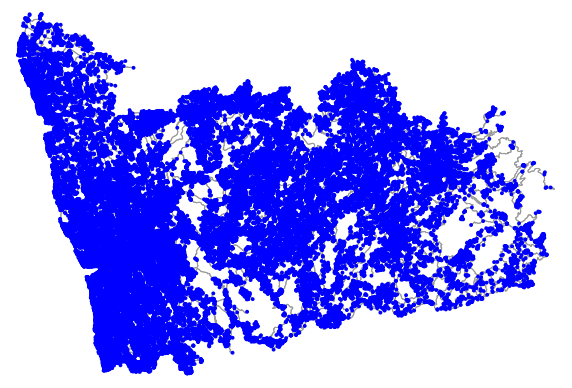

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [4]:
ox.plot_graph(G, figsize=(10, 10), bgcolor='#ffffff', node_color='b')

Download network with a boundary
https://www.openstreetmap.org/relation/3459013
http://polygons.openstreetmap.fr/?id=3459013

In [6]:
# Download by a boundary polygon in geojson
from shapely.geometry import shape
file_path = '../data/'
location = file_path + 'porto'
json_file = open(location+"_boundary.geojson")
import json
data = json.load(json_file)
boundary_polygon = shape(data["geometries"][0])
G = ox.graph_from_polygon(boundary_polygon, network_type='drive')
ox.io.save_graphml(G,filepath=location+'.graphml')
save_graph_shapefile_directional(G, filepath='../data/porto_by_geojson')

d:\Anaconda\lib\site-packages\osmnx\utils_geo.py:281: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
d:\Anaconda\lib\site-packages\osmnx\utils_geo.py:375: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
d:\Anaconda\lib\site-packages\osmnx\utils_geo.py:375: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


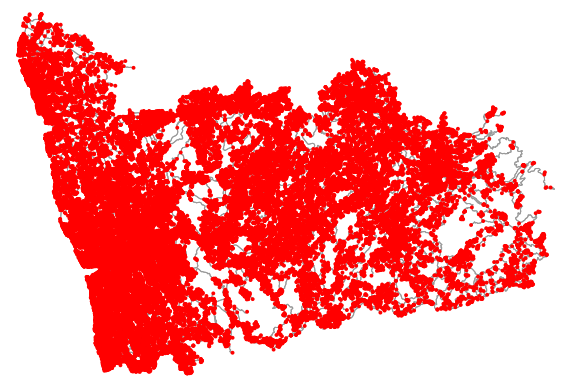

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [7]:
ox.plot_graph(G, figsize=(10, 10), bgcolor='#ffffff', node_color='r')

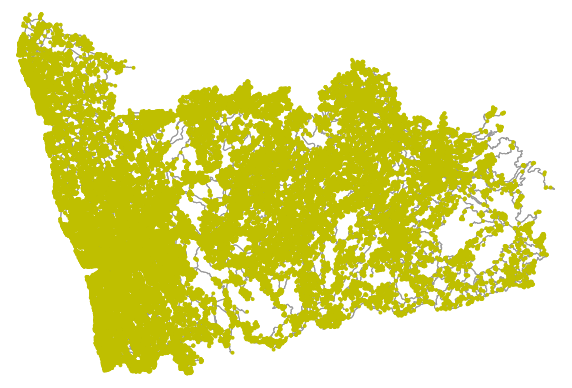

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [8]:
G = ox.io.load_graphml(filepath=location+'.graphml')
ox.plot_graph(G, figsize=(10, 10), bgcolor='#ffffff', node_color='y')

In [9]:
stats = ox.basic_stats(G)
stats

{'n': 77958,
 'm': 184857,
 'k_avg': 4.742476718232894,
 'intersection_count': 63145,
 'streets_per_node_avg': 2.6821750173170167,
 'streets_per_node_counts': {0: 0,
  1: 14813,
  2: 454,
  3: 57695,
  4: 4759,
  5: 167,
  6: 70},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.1900125708714949,
  2: 0.0058236486313142976,
  3: 0.740077990712948,
  4: 0.061045691269658024,
  5: 0.0021421791220913827,
  6: 0.0008979193924933939},
 'edge_length_total': 24571256.52699999,
 'edge_length_avg': 132.92034668419367,
 'street_length_total': 13453404.320000011,
 'street_length_avg': 128.67544996317667,
 'street_segments_count': 104553,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.114445266975346,
 'self_loop_proportion': 0.003716386179587465,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

Retrive the first 1000 trips in train.csv

In [10]:
template_data = []

with open('../data/train.csv', 'r') as f:
    for i in range(0, 1001):
        template_data.append(f.readline())

with open('../data/train-1000.csv', 'w') as f:
    f.write(''.join(template_data))